<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

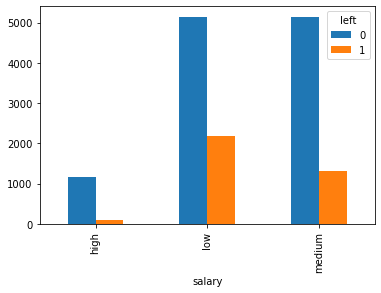

In [3]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

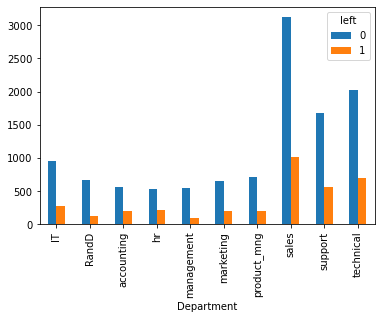

In [4]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [14]:
X = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [15]:
X = pd.concat([X, pd.get_dummies(X.salary, prefix="salary")], axis=1)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [16]:
X = X.drop(['salary'], axis=1)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [17]:
y = df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [18]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [19]:
lr.coef_

array([[-3.76919829e+00,  2.36201414e-03, -1.22865295e+00,
        -1.01407884e+00,  7.63560269e-01,  2.80012713e-01]])

In [20]:
lr.classes_

array([0, 1])

In [21]:
lr.intercept_

array([0.01997279])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [23]:
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
lr.score(X_test, y_test)

0.7783809523809524

In [26]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])